# INM433 Visual Analytics Final assignment
## An Analysis of Time Higher Education World University Ranking: A Visual Analytics Approach
### Ho Yin Tam, Valli Ramaswamy 

Import the libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
pd.set_option('display.max_columns', None)

Load the dataset.

In [4]:
uniranking = pd.read_csv('rank_from2011to2023_cleaned.csv', encoding='ISO-8859-1')
uniranking

,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,2011,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
1,2011,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,2011,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
3,2011,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,2011,5,5,Princeton University,94.2,5,90.9,6,70.3,53,-,164,95.4,5,99.9,3,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2023,1960,196,University of Erlangen-Nuremberg,54.5,1960,44.6,165,53.5,596,90.7,63,47.5,151,68.8,507,Germany,University of Erlangen-Nuremberg,"Archaeology,Computer Science,Sport Science,Bio...",False,False
2596,2023,1970,196,Sichuan University,54.5,1970,57.1,71,38.7,993,93.4,50,58.6,87,48.6,881,China,Sichuan University,"Mathematics & Statistics,Biological Sciences,L...",False,False
2597,2023,1980,198,Durham University,54.4,1980,40.0,234,94.3,57,39.4,1043,44.6,180,70.0,485,United Kingdom,Durham University united kingdom UK England,"Business & Management,Civil Engineering,Chemis...",False,False
2598,2023,1990,198,Queen??s University Belfast,54.4,1990,31.1,483,97.4,18,41.6,793,37.9,264,84.4,243,United Kingdom,Queen??s University Belfast qub queen&#039;s,"Psychology,Accounting & Finance,Law,Economics ...",False,False


Display basic statistics summary.

In [5]:
uniranking.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2600.0,2017.000000,3.742377,2011.0,2014.00,2017.0,2020.000,2023.0
rank_order,2600.0,587.420000,620.159489,1.0,98.00,195.0,1080.000,2000.0
rank,2600.0,100.061154,57.509961,1.0,50.00,100.0,150.000,200.0
scores_overall,2600.0,62.899538,12.271365,41.4,54.50,59.5,69.600,96.4
scores_overall_rank,2600.0,587.538462,620.071626,1.0,98.00,195.0,1080.000,2000.0
scores_teaching,2600.0,52.041615,16.568525,15.9,39.80,48.4,61.525,99.7
scores_teaching_rank,2600.0,128.893846,101.998760,1.0,51.00,106.0,181.000,659.0
scores_international_outlook_rank,2600.0,233.388077,200.215265,1.0,79.00,186.0,330.000,1445.0
scores_industry_income_rank,2600.0,276.149615,246.998096,1.0,94.00,200.0,386.000,1526.0
scores_research,2600.0,54.925885,18.895571,13.1,40.80,50.7,67.025,99.7


Check missing value.

In [6]:
uniranking.isnull().sum()

Year                                  0
rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_international_outlook          0
scores_international_outlook_rank     0
scores_industry_income                0
scores_industry_income_rank           0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
location                              0
aliases                               0
subjects_offered                     16
closed                                0
unaccredited                          0
dtype: int64

Check data type.

In [7]:
uniranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               2600 non-null   int64  
 1   rank_order                         2600 non-null   int64  
 2   rank                               2600 non-null   int64  
 3   name                               2600 non-null   object 
 4   scores_overall                     2600 non-null   float64
 5   scores_overall_rank                2600 non-null   int64  
 6   scores_teaching                    2600 non-null   float64
 7   scores_teaching_rank               2600 non-null   int64  
 8   scores_international_outlook       2600 non-null   object 
 9   scores_international_outlook_rank  2600 non-null   int64  
 10  scores_industry_income             2600 non-null   object 
 11  scores_industry_income_rank        2600 non-null   int64

Change the 'object' data type to 'numeric' data type.

In [8]:
uniranking['scores_international_outlook'] = pd.to_numeric(uniranking['scores_international_outlook'], errors='coerce')
uniranking['scores_industry_income'] = pd.to_numeric(uniranking['scores_industry_income'], errors='coerce')

In [9]:
uniranking.isnull().sum()

Year                                   0
rank_order                             0
rank                                   0
name                                   0
scores_overall                         0
scores_overall_rank                    0
scores_teaching                        0
scores_teaching_rank                   0
scores_international_outlook           9
scores_international_outlook_rank      0
scores_industry_income               135
scores_industry_income_rank            0
scores_research                        0
scores_research_rank                   0
scores_citations                       0
scores_citations_rank                  0
location                               0
aliases                                0
subjects_offered                      16
closed                                 0
unaccredited                           0
dtype: int64

Remove NA.

In [10]:
uniranking_nona = uniranking.dropna()
uniranking_nona

,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,2011,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
1,2011,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,2011,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
3,2011,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
5,2011,6,6,University of Oxford,91.2,7,88.2,9,77.2,42,73.5,28,93.9,8,95.1,22,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2023,1960,196,University of Erlangen-Nuremberg,54.5,1960,44.6,165,53.5,596,90.7,63,47.5,151,68.8,507,Germany,University of Erlangen-Nuremberg,"Archaeology,Computer Science,Sport Science,Bio...",False,False
2596,2023,1970,196,Sichuan University,54.5,1970,57.1,71,38.7,993,93.4,50,58.6,87,48.6,881,China,Sichuan University,"Mathematics & Statistics,Biological Sciences,L...",False,False
2597,2023,1980,198,Durham University,54.4,1980,40.0,234,94.3,57,39.4,1043,44.6,180,70.0,485,United Kingdom,Durham University united kingdom UK England,"Business & Management,Civil Engineering,Chemis...",False,False
2598,2023,1990,198,Queen??s University Belfast,54.4,1990,31.1,483,97.4,18,41.6,793,37.9,264,84.4,243,United Kingdom,Queen??s University Belfast qub queen&#039;s,"Psychology,Accounting & Finance,Law,Economics ...",False,False


In [11]:
uniranking_nona.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2447.0,2017.287291,3.649899,2011.0,2014.00,2017.0,2020.00,2023.0
rank_order,2447.0,616.477728,625.539705,1.0,104.00,250.0,1130.00,2000.0
rank,2447.0,100.085002,57.338933,1.0,51.00,100.0,149.00,200.0
scores_overall,2447.0,63.065591,12.180923,41.4,54.70,59.7,69.70,96.4
scores_overall_rank,2447.0,616.588067,625.453646,1.0,105.00,250.0,1130.00,2000.0
scores_teaching,2447.0,51.888721,16.582323,15.9,39.70,48.3,61.35,99.7
scores_teaching_rank,2447.0,130.720883,103.236137,1.0,51.00,108.0,184.00,659.0
scores_international_outlook,2447.0,67.083858,20.255114,14.8,52.70,67.3,84.95,100.0
scores_international_outlook_rank,2447.0,235.979567,204.592874,1.0,76.50,187.0,335.00,1445.0
scores_industry_income,2447.0,57.672906,22.034531,0.0,39.80,50.2,74.60,100.0


In [12]:
uniranking_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2447 entries, 0 to 2599
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               2447 non-null   int64  
 1   rank_order                         2447 non-null   int64  
 2   rank                               2447 non-null   int64  
 3   name                               2447 non-null   object 
 4   scores_overall                     2447 non-null   float64
 5   scores_overall_rank                2447 non-null   int64  
 6   scores_teaching                    2447 non-null   float64
 7   scores_teaching_rank               2447 non-null   int64  
 8   scores_international_outlook       2447 non-null   float64
 9   scores_international_outlook_rank  2447 non-null   int64  
 10  scores_industry_income             2447 non-null   float64
 11  scores_industry_income_rank        2447 non-null   int64  
 1

Drop the columns that are not numerical data or irrelevant.

In [13]:
uniranking_nona_histogram = uniranking_nona.drop(columns = ['Year', 'rank_order', 'rank', 'name', 
                                                            'scores_overall_rank', 
                                                            'scores_teaching_rank', 
                                                            'scores_international_outlook_rank',
                                                            'scores_industry_income_rank', 
                                                            'scores_research_rank', 
                                                            'scores_citations_rank', 
                                                            'location', 'aliases', 
                                                            'subjects_offered', 'closed', 'unaccredited'])
uniranking_nona_histogram

,scores_overall,scores_teaching,scores_international_outlook,scores_industry_income,scores_research,scores_citations
0,96.1,99.7,72.4,34.5,98.7,98.8
1,96.0,97.7,54.6,83.7,98.0,99.9
2,95.6,97.8,82.3,87.5,91.4,99.9
3,94.3,98.3,29.5,64.3,98.1,99.2
5,91.2,88.2,77.2,73.5,93.9,95.1
...,...,...,...,...,...,...
2595,54.5,44.6,53.5,90.7,47.5,68.8
2596,54.5,57.1,38.7,93.4,58.6,48.6
2597,54.4,40.0,94.3,39.4,44.6,70.0
2598,54.4,31.1,97.4,41.6,37.9,84.4


Display boxplot for the numerical data.

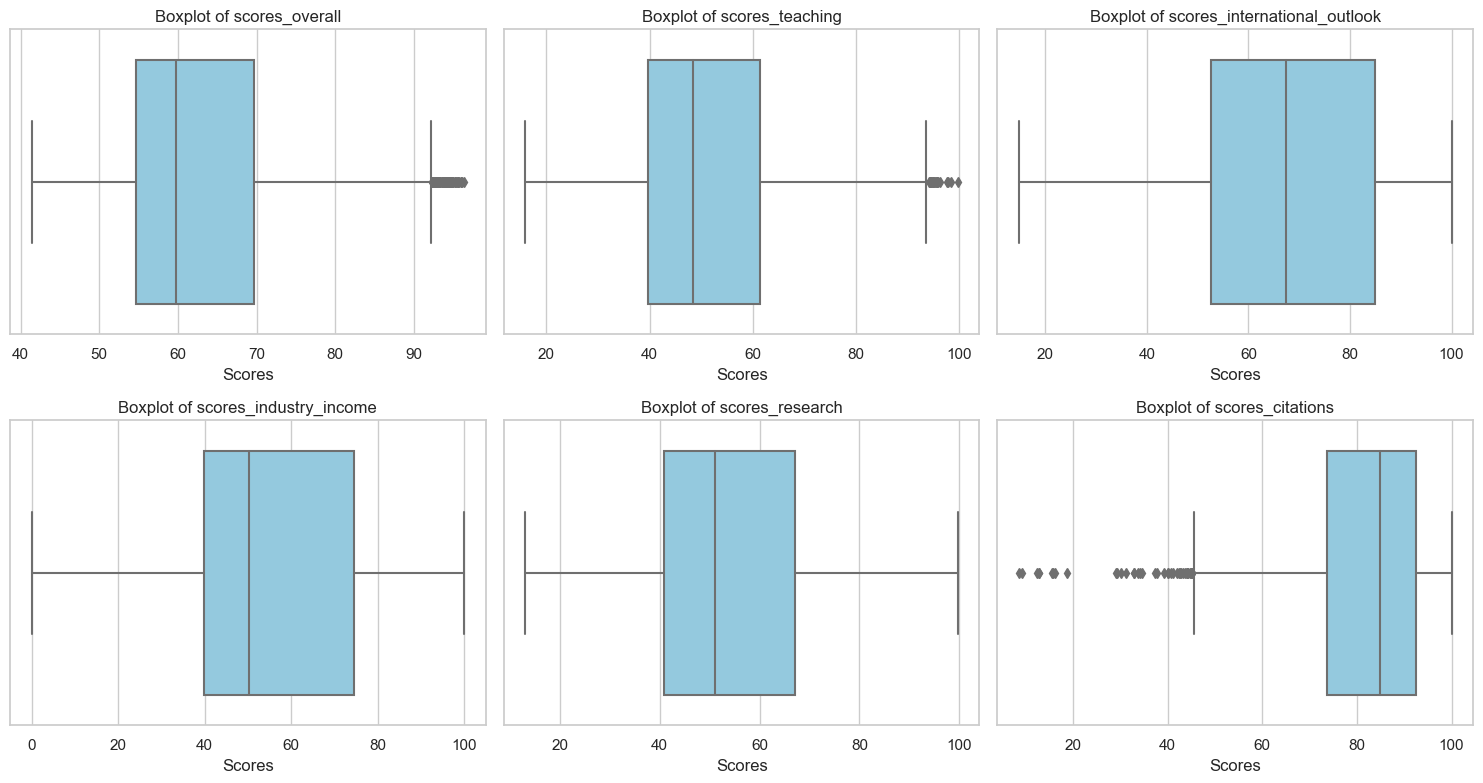

In [14]:
sns.set(style="whitegrid")

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Iterate over the columns and create boxplots
for i, column in enumerate(uniranking_nona_histogram.columns):
    sns.boxplot(x=uniranking_nona_histogram[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Scores')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Display historgram for the numerical data.

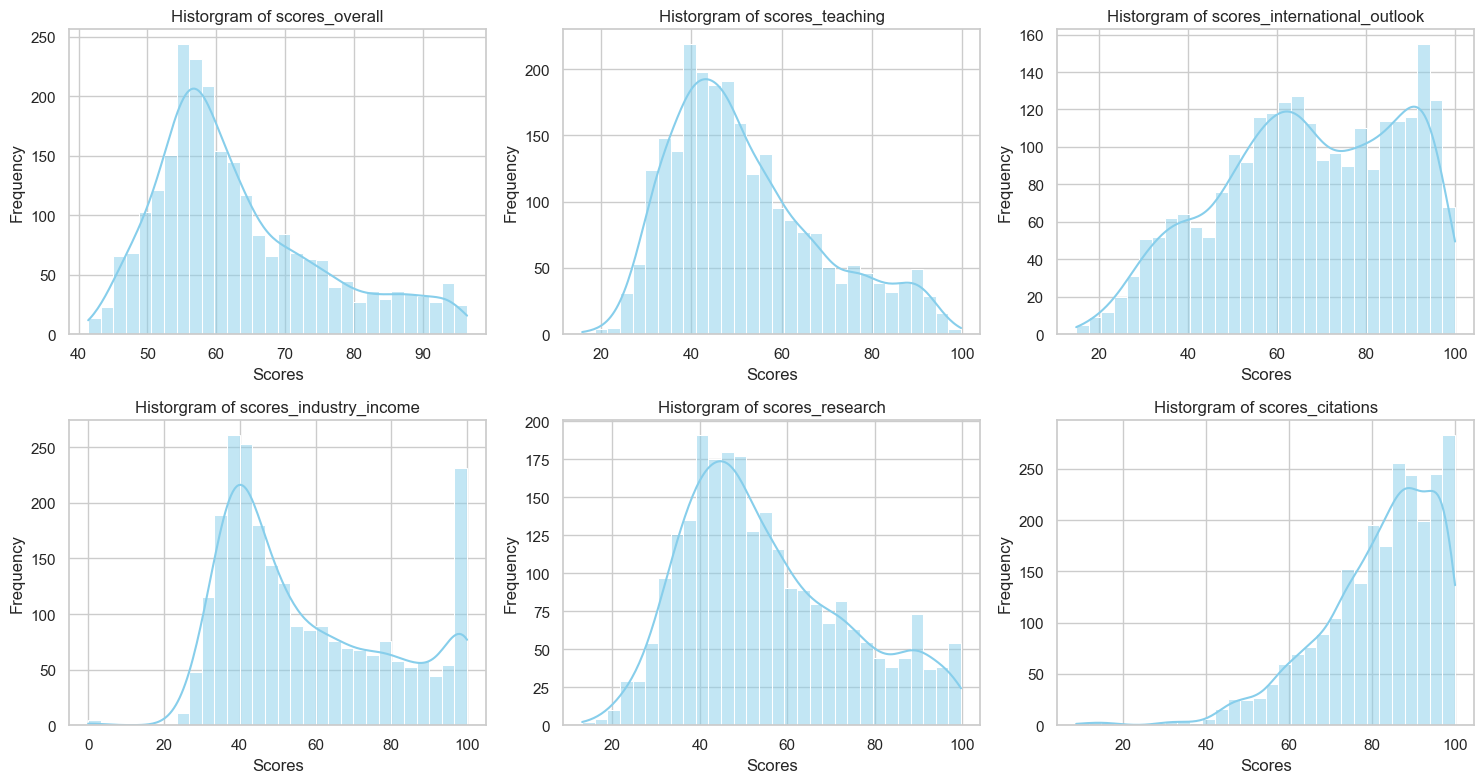

In [15]:
sns.set(style = "whitegrid")

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, column in enumerate(uniranking_nona_histogram.columns):
    sns.histplot(uniranking_nona_histogram[column], kde=True, color='skyblue', bins=30, ax=axes[i])
    axes[i].set_title(f'Historgram of {column}')
    axes[i].set_xlabel('Scores')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Question 1: Geographic analysis

Insert one more column 'region' to the table.

In [35]:
uniranking_nonaranking_nona_with_region = uniranking_nona.copy()
region_mapping = {
    'United States': 'North America',
    'United Kingdom': 'Europe',
    'Hong Kong': 'Asia',
    'South Korea': 'Asia',
    'Canada': 'North America',
    'Singapore': 'Asia',
    'Australia': 'Oceania',
    'China': 'Asia',
    'France': 'Europe',
    'Germany': 'Europe',
    'Switzerland': 'Europe',
    'Japan': 'Asia',
    'Ireland': 'Europe',
    'Sweden': 'Europe',
    'Finland': 'Europe',
    'Taiwan': 'Asia',
    'Turkey': 'Asia',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Spain': 'Europe',
    'New Zealand': 'Oceania',
    'Egypt': 'Africa',
    'Austria': 'Europe',
    'South Africa': 'Africa',
    'Israel': 'Asia',
    'Brazil': 'South America',
    'Italy': 'Europe',
    'Russian Federation': 'Europe',  # You might want to customize this
    'Luxembourg': 'Europe',
    'Saudi Arabia': 'Asia',
}

# Create a new 'region' column based on the 'location' column
uniranking_nonaranking_nona_with_region['region'] = uniranking_nonaranking_nona_with_region['location'].map(region_mapping)

# Display the updated DataFrame
uniranking_nonaranking_nona_with_region.head()

,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,region
0,2011,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,North America
1,2011,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,North America
2,2011,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,North America
3,2011,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,North America
5,2011,6,6,University of Oxford,91.2,7,88.2,9,77.2,42,73.5,28,93.9,8,95.1,22,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,Europe


Extract the 2011 table.

In [37]:
uniranking_nona_2011 = uniranking_nonaranking_nona_with_region[uniranking_nona['Year'] == 2011]
uniranking_count_2011 = uniranking_nona_2011.groupby('region').size().reset_index(name='count')
uniranking_count_2011

,region,count
0,Africa,1
1,Asia,25
2,Europe,70
3,North America,32
4,Oceania,7


Extract the 2023 table.

In [44]:
uniranking_nona_2023 = uniranking_nonaranking_nona_with_region[uniranking_nona['Year'] == 2023]
uniranking_count_2023 = uniranking_nona_2023.groupby('region').size().reset_index(name='count')
uniranking_count_2023

,region,count
0,Africa,1
1,Asia,28
2,Europe,95
3,North America,65
4,Oceania,11


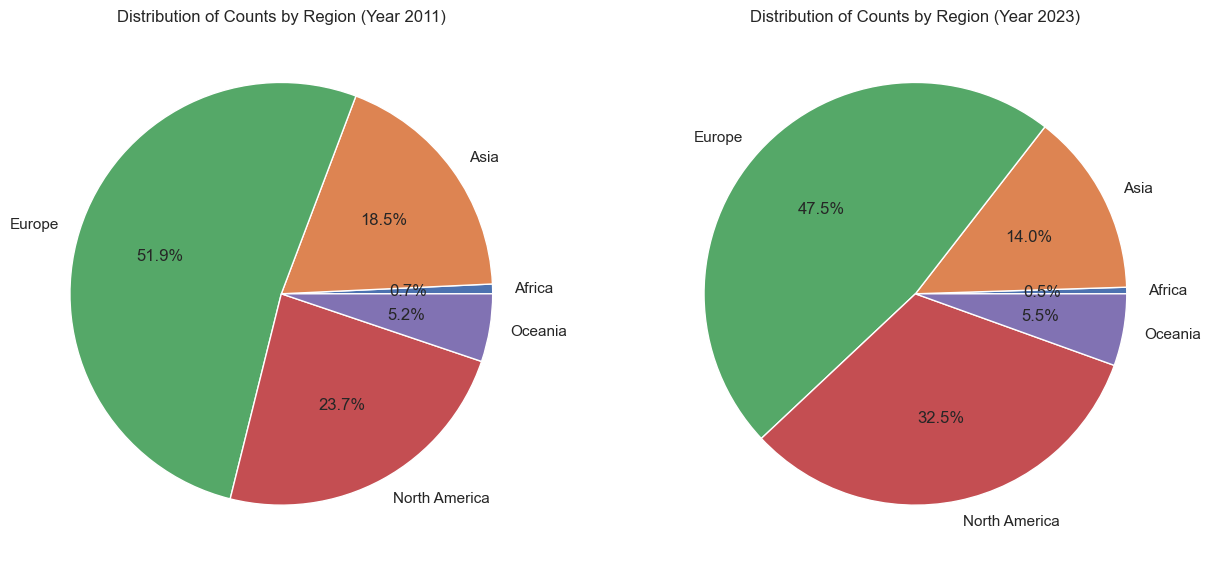

In [45]:
# Plotting the pie chart

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# First subplot
axes[0].pie(uniranking_count_2011['count'], labels = uniranking_count_2011['region'], autopct='%1.1f%%')
axes[0].set_title('Distribution of Counts by Region (Year 2011)')

# Second subplot
axes[1].pie(uniranking_count_2023['count'], labels=uniranking_count_2023['region'], autopct='%1.1f%%')
axes[1].set_title('Distribution of Counts by Region (Year 2023)')

plt.show()

Question 3: Correlation matrix heatpmap and scatter plot.

Display correlation matrix heatmap.

<Axes: >

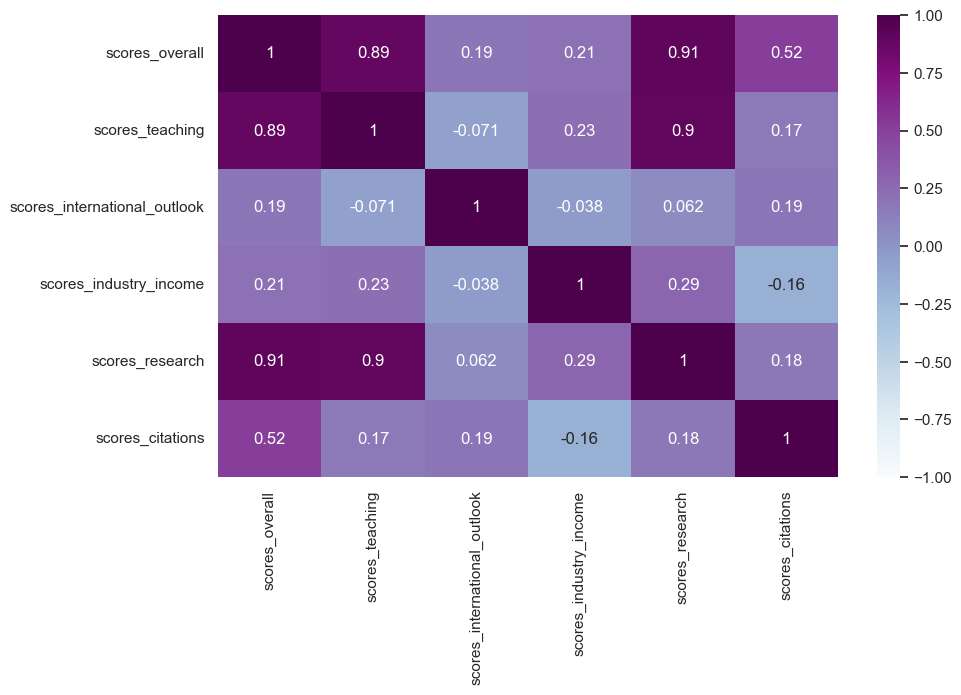

In [167]:
uniranking_nona_cm = uniranking_nona.drop(columns = ['Year', 'name', 'location', 'aliases', 
                                                     'subjects_offered', 'closed', 'unaccredited',
                                                     'rank', 'rank_order', 'scores_overall_rank', 'scores_teaching_rank',
                                                     'scores_international_outlook_rank', 'scores_industry_income_rank',
                                                     'scores_research_rank', 'scores_citations_rank'])
uniranking_nona_cm.corr()
plt.figure(figsize=(10,6))
sns.heatmap(uniranking_nona_cm.corr(), annot=True, cmap='BuPu', vmin=-1, vmax=1)

Display scatter plot.

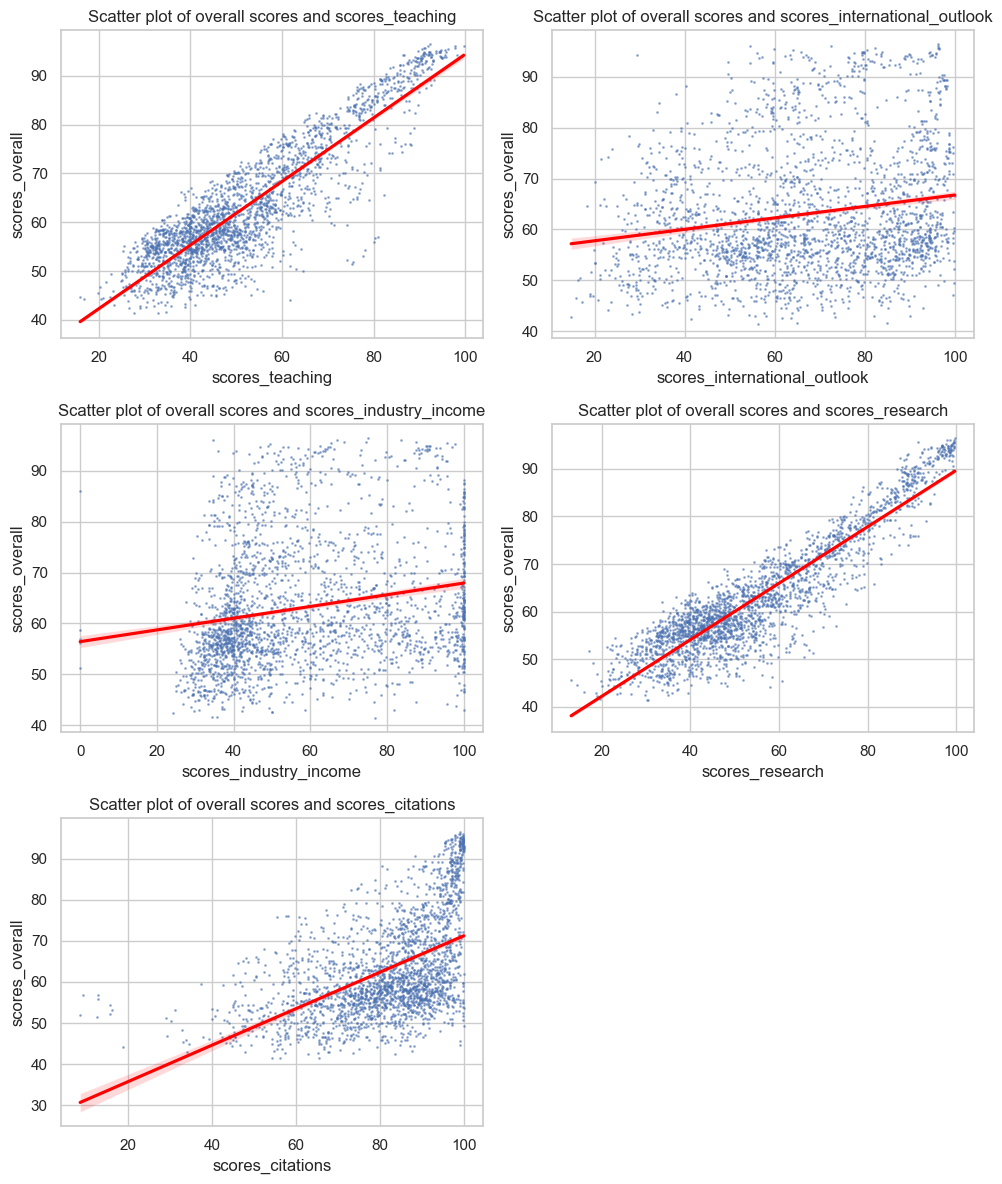

In [205]:
predictors = ['scores_teaching', 'scores_international_outlook', 
              'scores_industry_income', 'scores_research', 'scores_citations']

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
# Iterate through predictor variables
for i, predictor in enumerate(predictors):
    sns.regplot(x = predictor, y = 'scores_overall', data = uniranking_nona, ax = axes[i], 
                line_kws = {'color': 'red'}, scatter_kws = {'s': 1, 'alpha': 0.5})
    axes[i].set_title(f'Scatter plot of overall scores and {predictor}')
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

Question 4: Multiple linear regression model and random forest model.

Drop the columns that are not numerical data or irrelevant, including teaching scores due to multilinearity.

In [233]:
uniranking_nona_LR = uniranking_nona.drop(columns = ['Year', 'name', 'location', 'aliases', 
                                                     'subjects_offered', 'closed', 'unaccredited',
                                                     'rank', 'rank_order', 'scores_overall_rank', 'scores_teaching_rank',
                                                     'scores_international_outlook_rank', 'scores_industry_income_rank',
                                                     'scores_research_rank', 'scores_citations_rank', 
                                                     'scores_teaching'])
uniranking_nona_LR

,scores_overall,scores_international_outlook,scores_industry_income,scores_research,scores_citations
0,96.1,72.4,34.5,98.7,98.8
1,96.0,54.6,83.7,98.0,99.9
2,95.6,82.3,87.5,91.4,99.9
3,94.3,29.5,64.3,98.1,99.2
5,91.2,77.2,73.5,93.9,95.1
...,...,...,...,...,...
2595,54.5,53.5,90.7,47.5,68.8
2596,54.5,38.7,93.4,58.6,48.6
2597,54.4,94.3,39.4,44.6,70.0
2598,54.4,97.4,41.6,37.9,84.4


Split the dataset into a 80% training set and a 20% test set.

In [245]:
# Features
X = uniranking_nona_LR.drop(columns = 'scores_overall')
#print(X)
# Target
Y = uniranking_nona_LR['scores_overall']
#print(Y)
# Split the dataset into a 80% training set and a 20% test set. Random seed is 42. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Build the multiple linear regression model.

In [246]:
MLR = LinearRegression()
# Train the model with the training set
MLR.fit(X_train, Y_train)

# Use the model and test set to make prediction
Y_predict = MLR.predict(X_test)

# Calculate the R square
r2 = r2_score(Y_test, Y_predict)
print('The R-squared is:', r2)

The R-squared is: 0.9652679867677523


Residuals versus Fitted Values Plot

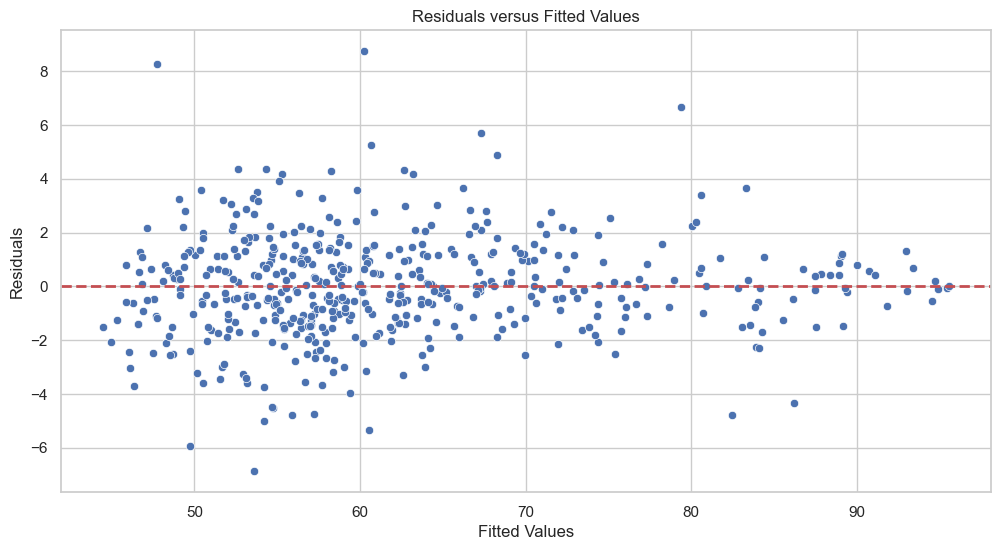

In [271]:
residuals = Y_test - Y_predict 
# Residuals versus Fitted Values Plot
plt.figure(figsize = (12, 6))
sns.scatterplot(x = Y_predict, y = residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

QQ Plot (Quantile-Quantile Plot)

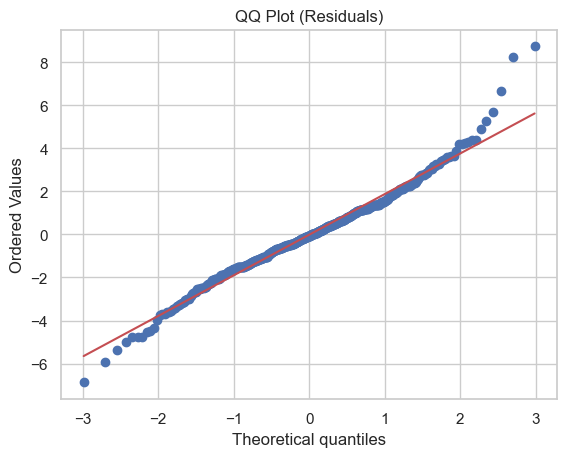

In [275]:
# QQ Plot (Quantile-Quantile Plot)
stats.probplot(residuals, plot = plt)
plt.title('QQ Plot (Residuals)')
plt.show()

Build random forest model.

In [247]:
RF = RandomForestRegressor(random_state = 42)
# Train the model with the training set
RF.fit(X_train, Y_train)

# Use the model and test set to make prediction
Y_predict = RF.predict(X_test)

# Calculate the R square
r2 = r2_score(Y_test, Y_predict)
print('The R-squared is:', r2)

The R-squared is: 0.9724463896324461


Feature importance of random forest.

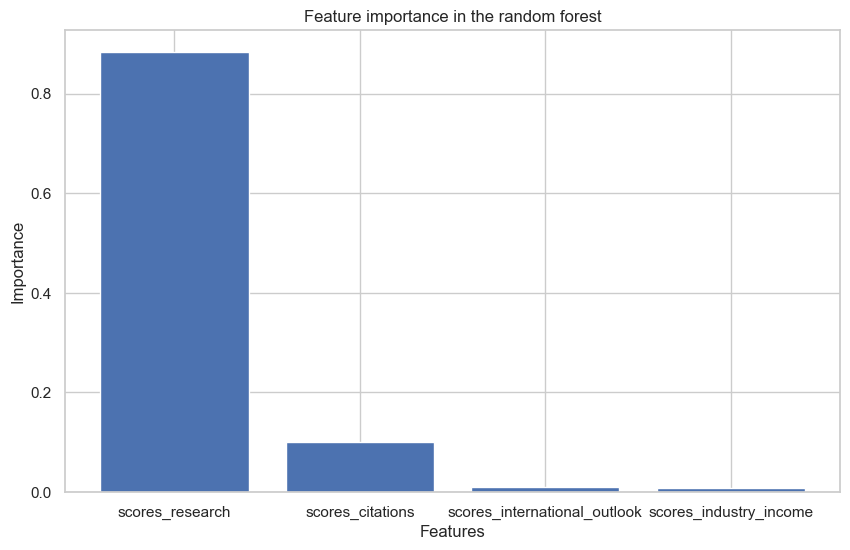

In [269]:
RF_feature_importance = RF.feature_importances_
# Get the indices that can sort the features in descending order
sorted_indices = RF_feature_importance.argsort()[::-1]

# Sort the feature importances and corresponding feature names
sorted_feature_importances = RF_feature_importance[sorted_indices]
sorted_feature_names = np.array(X.columns)[sorted_indices]

# Use bar chart to display the feature importance
plt.figure(figsize = (10,6))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.title('Feature importance in the random forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()